# How do I work with dates and times in pandas?


In [1]:
import pandas as pd

In [3]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

Time column is in object data type. To convert time column into pandas datetime format.

In [7]:
ufo['Time']=pd.to_datetime(ufo.Time)

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [10]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

to_datetime method is used to convert time column which is in object format in standard datetime 

In [12]:
# To get hour
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [13]:
# To get weekdayname
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [14]:
# To get weekday
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [16]:
# To get weekdayname
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [20]:
# comapring  

ts=pd.to_datetime('1/1/1999')
ufo.loc[ufo.Time>ts,:].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [21]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [22]:
ufo.Time.max()-ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [29]:
(ufo.Time.max()-ufo.Time.min()).days

25781

In [30]:
%matplotlib inline

In [32]:
ufo['year']=ufo.Time.dt.year

In [33]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


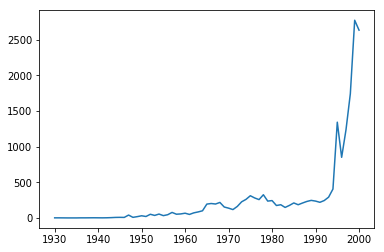

In [40]:
ufo.year.value_counts().sort_index().plot()